#### pandas 내장 그래프 도구
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 import하지 않고 간단히 그래프를 그릴 수 있음
- 선그래프 : df.plot() 메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선 그래프를 그림
- 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=T,alpha=0.8)
- 히스토그램 : df.plot(kind='hist')
- 산점도 : df.plot(x='',y'',kind='scatter'), 상관관계를 볼 수 있음
- 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

#### matplotlib
- histogram : plt.hist(x, bins=)
- line plot : plt.plot(x,y)
- plt.bar(x,t,color='')
- scatter plot : plt.scatter(x,y)

#### seaborn
- sns.distplot(data, bins=, color=, kde=)
- sns.boxplot(x,y,data,color)
- sns.violinplot(x,y,data,color)
- sns.barplot(x,y,data,color)
- sns.joinplot(x,y,data,color)
- sns.pairplot(data,hue,palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('./dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [2]:
col=['Date','Close','Start','High','Low','Volume']
df.drop('전일종가',axis=1,inplace=True)
df.columns=col
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [4]:
# Date를 datetime 으로 변경한 후 인덱스로 세팅
df.Date = pd.to_datetime(df.Date)
df1 = df.set_index('Date')
df1.drop(['Volume'],axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


In [6]:
# 선그래프
df1 = df[['Close','Start','High','Low']]
df1 = df1.sort_index()

<AxesSubplot:>

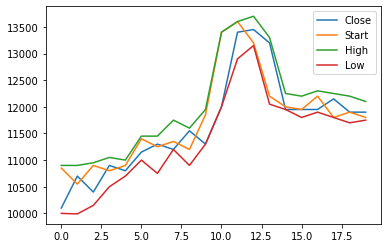

In [7]:
df1.plot()

<AxesSubplot:xlabel='Date'>

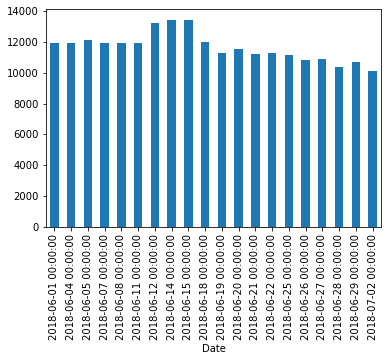

In [5]:
df2=df1.sort_index()
df2.Close.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

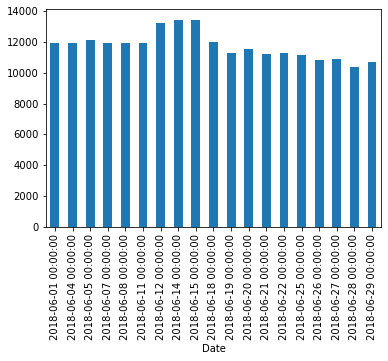

In [11]:
# Q. 6월 데이터만을 추출해서 Close 칼럼으로 일별 막대 그래프를 표현하세요.
df2.loc[df2.index<'2018-07-01'].Close.plot(kind='bar')

df2.loc['2018-06'].Close.plot(kind='bar')


In [13]:
df2.head()
df2.loc['2018-07']

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000


<AxesSubplot:ylabel='Frequency'>

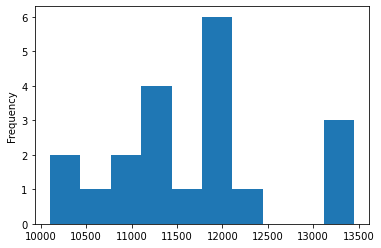

In [14]:
df2.Close.plot(kind='hist')

In [16]:
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


<AxesSubplot:ylabel='Frequency'>

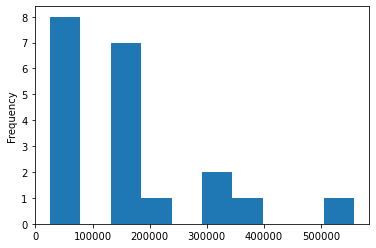

In [17]:
df.Volume.plot(kind='hist')

In [18]:
df.Volume.describe()

count        20.000000
mean     158014.150000
std      134473.512003
min       25171.000000
25%       58323.250000
50%      134176.500000
75%      185836.000000
max      558148.000000
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Volume', ylabel='Count'>

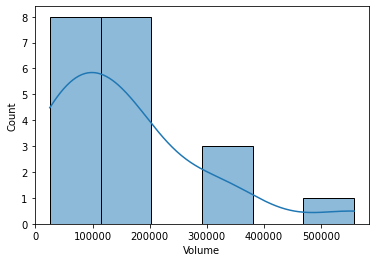

In [19]:
import seaborn as sns
sns.histplot(df.Volume,kde=True)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

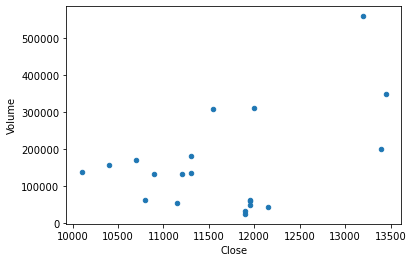

In [20]:
# 산점도 
df.plot(x='Close',y='Volume',kind='scatter')

<AxesSubplot:>

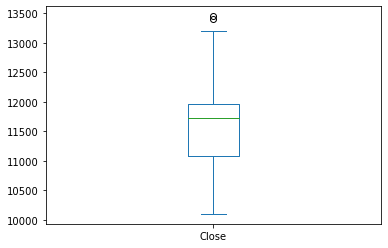

In [21]:
# Box Plot
df.Close.plot(kind='box')

#### Box plot 의미 해석
- IQR(Inter Quartile Range) : 제3사분위수(Q3) - 제1사분위수(Q1)
- lower whisker : Q1 - (1.5 * IQR) 이내인 값 중에서 최솟값
- upper whisker : Q3 + (1.5 * IQR) 이내인 값 중에서 최댓값
- 이상치 : lower whisker, upper whisker를 벗어나는 값

In [22]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [36]:
# Close 칼럼의 이상치
df3=df.sort_values(by=['Close'],ascending=False)
Q1 = df3.Close.quantile(.25)
Q3 = df3.Close.describe()['75%']
IQR = Q3 - Q1
print(Q3+1.5*IQR)
print(df3.Close)
df3.Close.loc[df3.Close > Q3 +1.5*IQR]

13275.0
12    13450
11    13400
13    13200
17    12150
10    12000
16    11950
15    11950
14    11950
18    11900
19    11900
8     11550
9     11300
6     11300
7     11200
5     11150
3     10900
4     10800
1     10700
2     10400
0     10100
Name: Close, dtype: int64


12    13450
11    13400
Name: Close, dtype: int64

9812.5
13362.5
1     10550
3     10800
0     10850
2     10900
4     10900
8     11200
6     11250
7     11350
5     11400
17    11800
19    11800
9     11850
18    11900
15    11950
14    12000
13    12200
16    12200
12    13200
10    13400
11    13600
Name: Start, dtype: int64
10    13400
11    13600
Name: Start, dtype: int64
Series([], Name: Start, dtype: int64)


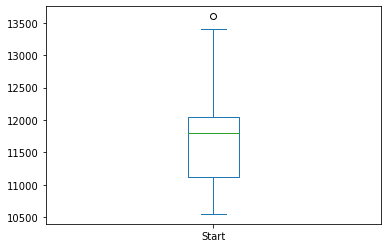

In [43]:
# [과제] Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.
df.Start.plot(kind='box')
df4=df.sort_values(by=['Start'])
Q1=df4.Start.quantile(.25)
Q3=df4.Start.quantile(.75)
iQR = Q3 - Q1
lw=Q1-1.5*IQR
uw=Q3+1.5*IQR
print(lw)
print(uw)
print(df4.Start)
# df4.Start.loc[df4.Start>uw | df4.Start<lw]
print(df4.Start.loc[df4.Start>uw])
print(df4.Start.loc[df4.Start<lw])

[과제] df_ep 데이터 프레임으로 다음을 수행하세요.
- 선그래프
- 'south'칼럼의 막대그래프
- 'south'칼럼의 히스토그램
- box plot

In [ ]:
# [과제] df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요 (5개 이상)

(array([1., 0., 3., 1., 1., 2., 1., 1., 2., 0., 4., 1., 3., 4., 1., 2., 3.,
        0., 3., 1., 3., 0., 2., 3., 2., 1., 1., 1., 2., 1.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ,
        21.8, 23.6, 25.4, 27.2, 29. , 30.8, 32.6, 34.4, 36.2, 38. , 39.8,
        41.6, 43.4, 45.2, 47. , 48.8, 50.6, 52.4, 54.2, 56. ]),
 <BarContainer object of 30 artists>)

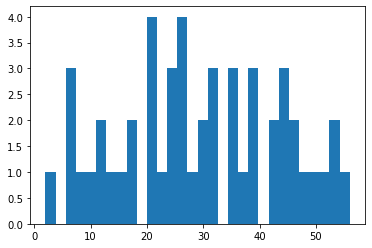

In [4]:
import numpy as np
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

import matplotlib.pyplot as plt
np.random.seed(0)
data = np.arange(50) + np.random.randint(1,10,size=50)
plt.hist(data, bins=30)

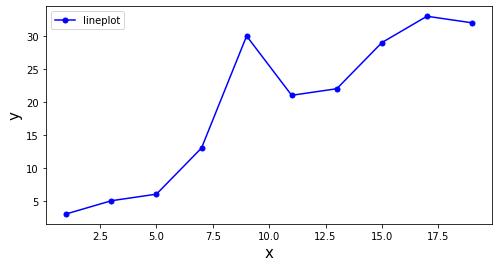

In [9]:
import numpy as np
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

plt.figure(figsize=(8,4)) # 도표 총 사이즈
plt.plot(x,y,color='blue',marker='o',markersize=5) 
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
plt.legend(labels=['lineplot'])


Text(0.5, 1.0, 'Lone Graph')

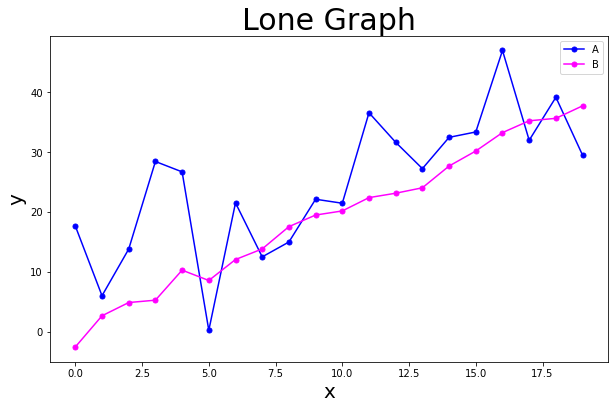

In [19]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
y2 = np.arange(20)*2 + np.random.randn(20)

plt.figure(figsize=(10,6)) # 도표 총 사이즈
plt.plot(x,y1,color='blue',marker='o',markersize=5)
plt.plot(x,y2,color='magenta',marker='o',markersize=5) 
plt.xlabel('x',size=20)
plt.ylabel('y',size=20)
plt.legend(labels=['A','B'])
plt.title('Lone Graph', size=30)

Text(0.5, 0, 'X')

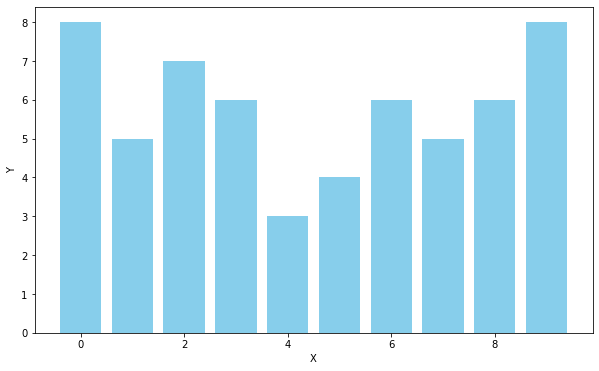

In [20]:
# 막대그래프
y=np.random.randint(2,10,size=10)
x=range(len(y))
plt.figure(figsize=(10,6))
plt.bar(x,y,width=0.8,color='skyblue')
plt.ylabel('Y')
plt.xlabel('X')

In [22]:
import pandas as pd
df=pd.read_csv('./dataset/movie.csv')
df.head()

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

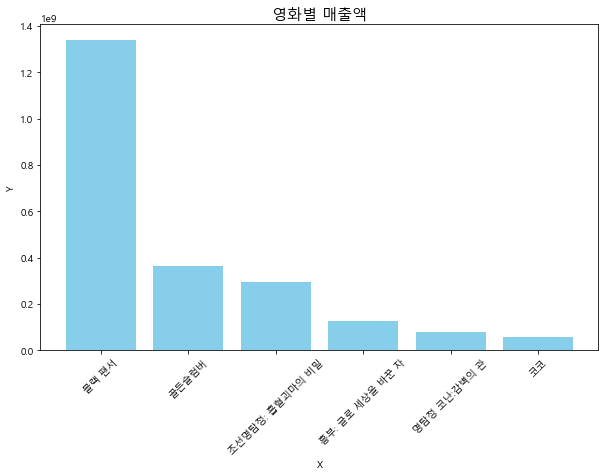

In [35]:
import matplotlib as mpl

mpl.rc('font',family='Malgun Gothic') # 한글폰트 설정
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 단위 처리
x=df.movieNm
y=df.salesAmt
plt.figure(figsize=(10,6))
plt.bar(x,y,color='skyblue')
plt.title('영화별 매출액',size=15)
plt.ylabel('Y')
plt.xlabel('X')
plt.xticks(rotation=45)

Text(0, 0.5, 'weight')

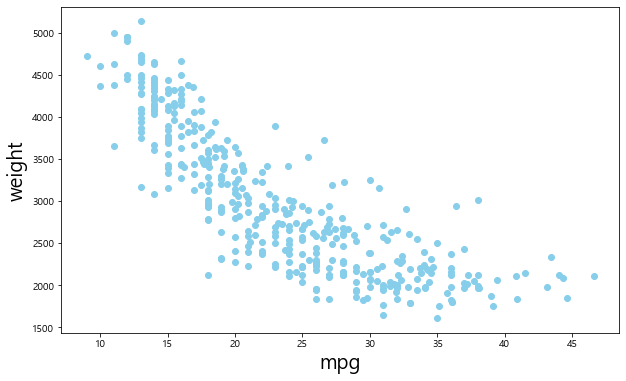

In [39]:
# scatter plot
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx',engine='openpyxl')
x=df_auto.mpg
y=df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue')
plt.xlabel('mpg',size=20)
plt.ylabel('weight',size=20)